In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
print(df_test.shape)
print(df_train.shape)

(2077964, 21)
(3116945, 22)


In [3]:
#Data Inspection

In [4]:
df_train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [5]:
#training dataset

categorical_cols = df_train.select_dtypes(include = ['object']).columns
for col in categorical_cols:
    print(f"\n unique values in {col}")
    print(df_train[col].value_counts())


 unique values in class
class
p    1705396
e    1411549
Name: count, dtype: int64

 unique values in cap-shape
cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

 unique values in cap-surface
cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

 unique values in cap-color
cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

 unique values in does-bruise-or-bleed
does-bruise-or-bleed
f           2569

In [6]:

#test data set
categorical_columns = df_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df_test[col].value_counts())


Unique values in cap-shape:
cap-shape
x       957949
f       452360
s       242698
b       211879
o        71972
         ...  
5.59         1
4.41         1
3.73         1
3.47         1
4.54         1
Name: count, Length: 62, dtype: int64

Unique values in cap-surface:
cap-surface
t                    306852
s                    257190
y                    218336
h                    189737
g                    176140
d                    137675
k                     86041
e                     79918
i                     75570
w                     73109
l                     30101
f                        54
n                        50
p                        44
o                        37
a                        28
x                        27
m                        25
r                        25
u                        21
c                        19
b                        14
z                         6
spore-print-color         3
season                    3
does None      

In [7]:
# all our categorical values are mixed with numerical data, probably due to the noise added so we will remove
# and set expectations for what the values should be


In [8]:

category_mappings = {
    # 'class': ['p', 'e'],
    'season': ['a', 'u', 'w', 's'],
    'cap-shape': ['x', 'f', 's', 'b', 'o'],
    'cap-surface': ['t', 's', 'y', 'h', 'g'],
    'cap-color': ['n', 'y', 'w', 'g', 'e'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'd', 'x', 'e', 's'],
    'gill-spacing': ['c', 'd', 'f'],
    'gill-color': ['w', 'n', 'y', 'p', 'g'],
    'stem-root': ['b', 's', 'r', 'c', 'f'],
    'stem-surface': ['s', 'y', 'i', 't', 'g', 'k', 'h', 'f'],
    'stem-color': ['w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b'],
    'veil-type': ['u', 'w'],
    'veil-color': ['w', 'y', 'n', 'u', 'k', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm'],
    'spore-print-color': ['k', 'p', 'w', 'n', 'r', 'u', 'g'],
    'habitat': ['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u'],
}

In [9]:
def clean_category(column, df, valid_category,threshold):
    df[column] = df[column].astype(str)
    counts = df[column].value_counts(normalize = True)


    def map_category(value):
        if value.replace('.','').isdigit():
            return 'Other'

        elif value.lower() in [cat.lower() for cat in valid_category]:
            return next(cat for cat in valid_category if cat.lower() == value.lower())
        elif counts.get(value,0) < threshold:
            return 'Other'
        else:
            return value
    df[column] = df[column].apply(map_category)

    return df
    

In [10]:
for column, valid in category_mappings.items():
    df_train  = clean_category(column,df_train,valid,0.1)
    df_test = clean_category(column,df_train,valid,0.1)

In [12]:
for column in category_mappings.keys():
    print(f"\nUnique values in {column} after cleaning:")
    print(df_test[column].value_counts())


Unique values in season after cleaning:
season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

Unique values in cap-shape after cleaning:
cap-shape
x        1436026
f         676238
s         365146
b         318646
Other     212054
o         108835
Name: count, dtype: int64

Unique values in cap-surface after cleaning:
cap-surface
Other    724160
nan      671023
t        460777
s        384970
y        327826
h        284460
g        263729
Name: count, dtype: int64

Unique values in cap-color after cleaning:
cap-color
n        1359542
Other     583219
y         386627
w         379442
g         210825
e         197290
Name: count, dtype: int64

Unique values in does-bruise-or-bleed after cleaning:
does-bruise-or-bleed
f        2569743
t         547085
Other        117
Name: count, dtype: int64

Unique values in gill-attachment after cleaning:
gill-attachment
a        646034
d        589236
nan      523936
Other    399564
x        360878
e        301858

In [17]:
df_train['class'] = df_train['class'].replace({'e': 'Edible', 'p': 'Poisonous'})
df_train['season'] = df_train['season'].replace({'a':'autum','u':'summer', 'w': 'winter', 's':'spring'})

In [18]:
#Visualization

/var/folders/n3/_xbw88791wx3w7f1hz1vjvnc0000gn/T/ipykernel_90473/866511429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


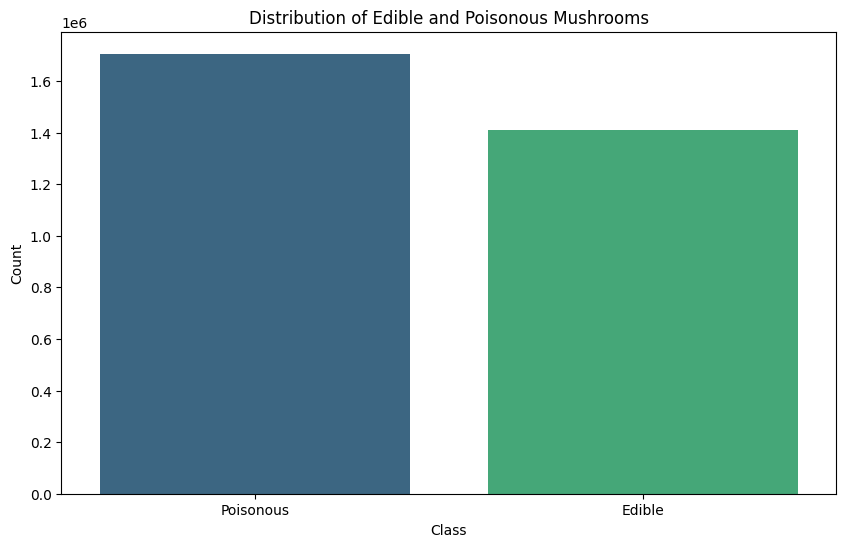

In [22]:
counts = df_train['class'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Distribution of Edible and Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

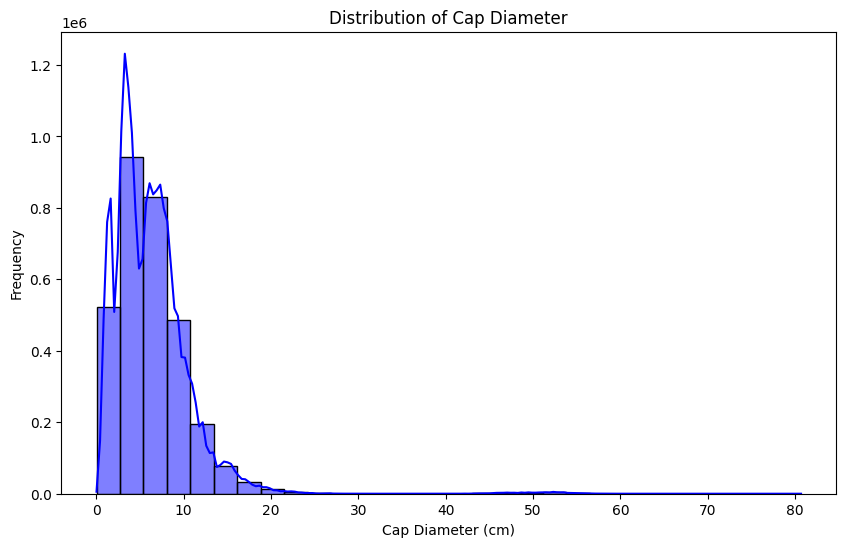

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['cap-diameter'], kde=True, bins=30, color='blue')
plt.title('Distribution of Cap Diameter')
plt.xlabel('Cap Diameter (cm)')
plt.ylabel('Frequency')
plt.show()

/var/folders/n3/_xbw88791wx3w7f1hz1vjvnc0000gn/T/ipykernel_90473/553321166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cap_color_counts.index, y=cap_color_counts.values, palette='coolwarm')


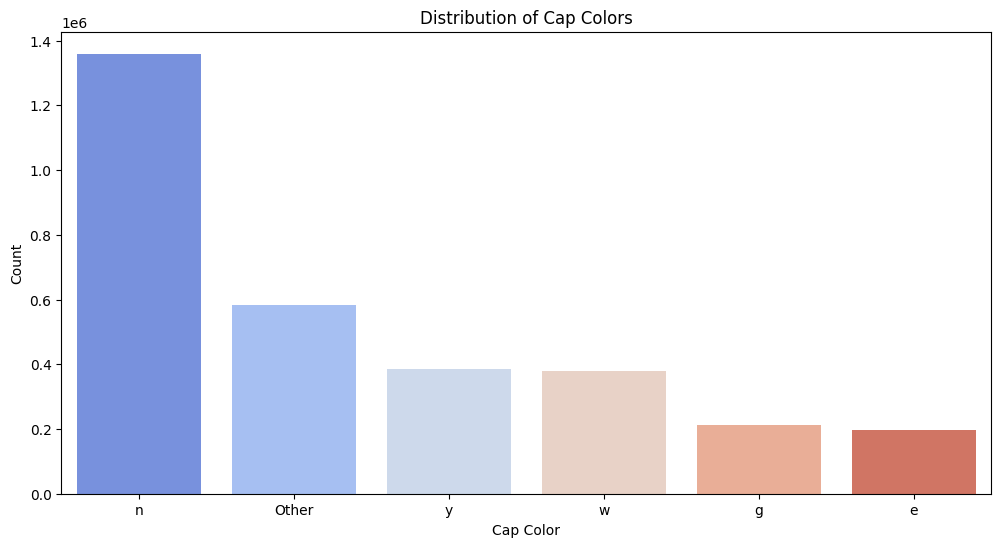

In [25]:
cap_color_counts = df_train['cap-color'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cap_color_counts.index, y=cap_color_counts.values, palette='coolwarm')
plt.title('Distribution of Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

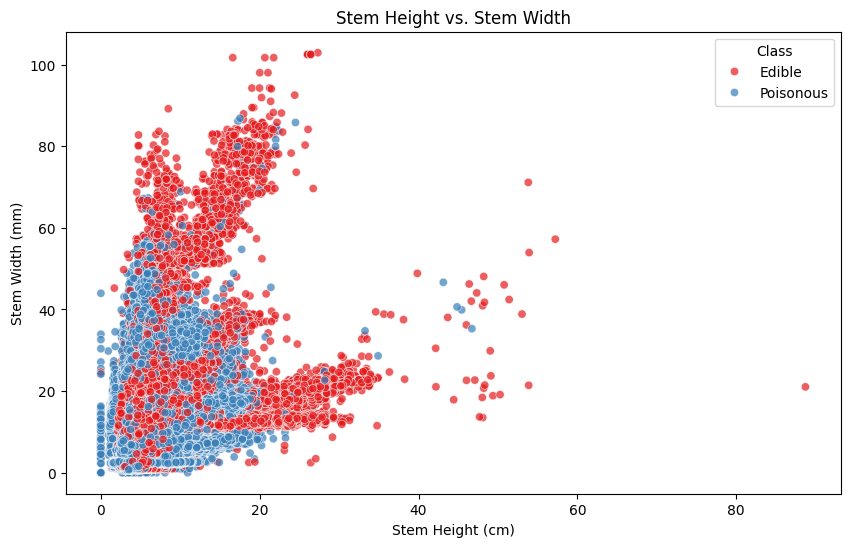

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stem-height', y='stem-width', hue='class', data=df_train, palette='Set1', alpha=0.7)
plt.title('Stem Height vs. Stem Width')
plt.xlabel('Stem Height (cm)')
plt.ylabel('Stem Width (mm)')
plt.legend(title='Class')
plt.show()